# Scraping: H&M Sales

**It's officially hot outside**, which means we need some summertime clothes. We live in New York City, though, so all our money goes to rent: we need to shop *as cheaply as possible*. So let's shop [sales at H&M](http://www.hm.com/us/products/sale)!

**Answer the questions below using either Men's or Women's sale items at H&M.**

## Preparation: knowing your tags

### What is the tag name and class name for a product?

In [1]:
#tag name is div, class name is product-list-item

### What is the tag name and class name for the old price? The new price?

In [2]:
#tag name is span, class name is "price" and "old-price"

### What is the tag name and class name for the link to the product page?

In [3]:
#tag name is "a", class name is "product-url js-product-tracking"

## Setup: Import what you'll need to scrape the page

Use `requests`, not `urllib`.

In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

## Try to scrape the page: how many product names can you find?

"Try" to do it, because it *will not work.* Once you've learned that it won't work, spend a few minutes **looking at the page code** to see if you can figure out why.

Eventually, ask for help by writing on the board.

In [5]:
response = requests.get("http://api.hm.com/v2/us/en/products/display?categories=sale&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP")
data = response.json()

In [6]:
articles = data['displayArticles']

In [7]:
names = []
for article in articles:
    name = article['name']
    names.append(name)
print(names)
len(names)

['Fine-knit Cardigan', '2-pack Push-up Bras', 'Jersey Top', 'Fine-knit Cardigan', 'V-neck Blouse', 'Slim-fit Pants', 'Cotton Blouse', 'Jersey Top', 'Wide-cut Top', 'T-shirt with Motif', '2-pack Push-up Bras', 'Fine-knit Sweater', '2-pack Jersey Tops', 'Short T-shirt', 'Jersey Top', 'Denim Joggers', 'Pajama Tank Top and Shorts', 'Printed Sweatshirt', 'Pajama Tank Top and Shorts', 'Slim-fit Leggings', 'Short-sleeved Shirt Slim fit', 'MAMA Jersey Top', 'Twill Pants Regular fit', 'Cotton Chinos', 'Cotton Shirt', 'Cotton Chinos', 'Round-neck T-shirt Regular fit', 'Jersey Top', 'Cotton Chinos', 'V-neck T-shirt Slim fit', 'Skinny Low Jeans', 'Joggers', 'V-neck T-shirt Regular fit', 'Cotton Cap with Embroidery', 'Short-sleeved Shirt Slim fit', 'Jersey Top', 'Denim Shirt', 'Roll-up Cargo Pants', 'Harem Pants', 'Jersey Top', 'Long-sleeved Blouse', 'Chinos Skinny Fit', 'Fine-knit Sweater', 'Printed Sweatshirt', 'Crew-neck T-shirt Slim fit', 'Treggings', 'Sweatpants', 'Sweater with Printed Motif',

60

## URLs

### What is the URL for data about on-sale men's clothing?

In [8]:
url_men = ("http://api.hm.com/v2/us/en/products/"+\
           "display?categories=sale%2Fmen&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP")

### What is the URL for data about on-sale women's clothing?

In [9]:
url_women = ("http://api.hm.com/v2/us/en/products/"+\
             "display?categories=sale%2Fladies&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP")

### What is the URL for data about on-sale women's tops?

In [10]:
url_women_top = ("http://api.hm.com/v2/us/en/products/display?"+\
                 "categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP")

### What changes about the url based on what you're looking for?

In [11]:
# the "categories" criterium

## Request on-sale women's tops.

### How many results do you get?

In [12]:
response = requests.get(url_women_top)
data = response.json()

### How many total results are there? How do you change the URL to get more?

There are a few ways to change the URL to: there is one very easy way and one a-little-difficult way.

In [13]:
articles = data['displayArticles']
names = []
for article in articles:
    name = article['name']
    names.append(name)
len(names)

60

In [14]:
#increase pageSize
names = []
page_number = 1

In [15]:
while True:
    url_women_top = ("http://api.hm.com/v2/us/en/products/display?"+\
                    "categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page="\
                    +str(page_number)+"&deviceType=DESKTOP")
    response = requests.get(url_women_top)
    data = response.json()
    if data['displayArticles']:
        articles = data['displayArticles']
        for article in articles:
            name = article['name']
            names.append(name)
            print(name)
        page_number += 1
    else:
        break;

Beaded Camisole Top
V-neck Top
V-neck Top
Long-sleeved Jersey Top
Draped Top
Long-sleeved Top
Long-sleeved Top
Long-sleeved Top
Jersey Camisole Top
T-shirt with Motif
One-shoulder Top
Slub Jersey Top
Polo Shirt
Short Lace Top
Jersey Camisole Top with Lace
Pleated Top
Airy Jersey Top
Polo Shirt
Glittery Bustier
Crushed-velvet Camisole Top
Pleated Top
Lace Camisole Top
Mock-turtleneck Top
Ribbed Top
Lyocell Top
Lyocell Top
Short Top
Long-sleeved Jersey Top
Crushed-velvet Camisole Top
Satin Peplum Top
Jersey Top
Jersey Top
Wide-cut Top
T-shirt with Motif
Short T-shirt
Jersey Top
Jersey Top
Jersey Top
Jersey Top
Tank Top with Lacing
Top with Lace Yoke
Lyocell Top
Jersey Top
Short-sleeved Top
V-neck Jersey Top
Short-sleeved Top
Long-sleeved Jersey Top
Long-sleeved Jersey Top
T-shirt with Motif
Top with Printed Design
Long-sleeved Top
Short T-shirt
Ribbed Tank Top
Linen Scoop-neck Top
Short Jersey Tank Top
Crêped Camisole Top
Crinkled Off-the-shoulder Top
Lyocell Jersey Tank Top
Long-sleeved

In [16]:
len(names)

360

### Download all on-sale women's tops and save them to a CSV.

I want this CSV to include

- Name
- Product code/number
- Old price
- On-sale price
- Item's URL

In [17]:
products = []
page_number = 1

while True:
    url_women_top = ("http://api.hm.com/v2/us/en/products/display?"+\
                    "categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page="\
                    +str(page_number)+"&deviceType=DESKTOP")
    response = requests.get(url_women_top)
    data = response.json()
    if data['displayArticles']:
        articles = data['displayArticles']
        for article in articles:
            current = {}
            current['Name'] = article['name']
            current['Product code'] = article['productNumber']
            current['Old price'] = article['priceInfo']['formattedOldPrice']
            current['New price'] = article['priceInfo']['formattedPrice']
            current['URL'] = article['webUrl']
            products.append(current)
        page_number += 1
    else:
        break;

In [18]:
df = pd.DataFrame(products)
df.to_csv('HM_prices.csv', index=False)

## Analyzing on-sale items

### Read in the on-sale CSV and make sure the data looks right

In [19]:
df = df.from_csv('HM_prices.csv')
df

,New price,Old price,Product code,URL
Name,,,,
Beaded Camisole Top,$7.99,$17.99,47468,http://www.hm.com/us/product/47468?article=474...
V-neck Top,$7.99,$17.99,69690,http://www.hm.com/us/product/69690?article=696...
V-neck Top,$7.99,$17.99,69690,http://www.hm.com/us/product/69690?article=696...
Long-sleeved Jersey Top,$19.99,$24.99,64062,http://www.hm.com/us/product/64062?article=640...
Draped Top,$9.99,$19.99,61712,http://www.hm.com/us/product/61712?article=617...
Long-sleeved Top,$14.99,$24.99,56522,http://www.hm.com/us/product/56522?article=565...
Long-sleeved Top,$12.99,$24.99,56522,http://www.hm.com/us/product/56522?article=565...
Long-sleeved Top,$14.99,$24.99,56522,http://www.hm.com/us/product/56522?article=565...
Jersey Camisole Top,$3.99,$4.99,46245,http://www.hm.com/us/product/46245?article=462...


### Convert the prices to numbers, if you haven't already

In [20]:
df['New price'] = df['New price'].str.replace('$', '')
df['Old price'] = df['Old price'].str.replace('$', '')

### What is the average on-sale price of a women's top? Make a histogram, too, please.

The average on-sale price is $ 11.19


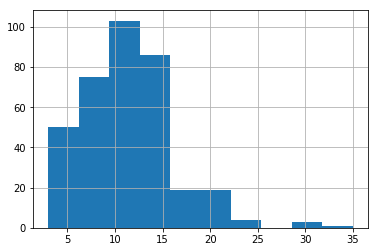

In [28]:
%matplotlib inline
print("The average on-sale price is $",round(df['New price'].astype(float).mean(),2))
df['New price'].astype(float).hist()

### What is the average discount between full price and on sale? Histogram too, please.

The average discount is $ 8.56


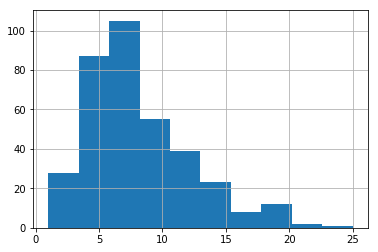

In [29]:
discount_dollar = df['Old price'].astype(float)-df['New price'].astype(float)
print("The average discount is $",round(discount_dollar.mean(),2))
(df['Old price'].astype(float)-df['New price'].astype(float)).hist()

### What is the average discount as a percentage of the full price? Histogram too, please.

The average discount is 42.62 per cent


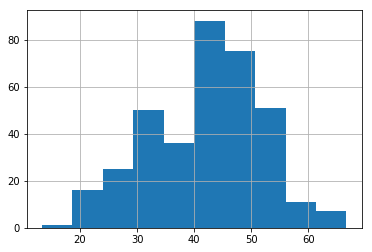

In [31]:
discount_percentage = (df['Old price'].astype(float)-df['New price'].astype(float))/df['Old price'].astype(float)*100
print("The average discount is",round(discount_percentage.mean(),2),"per cent")
((df['Old price'].astype(float)-df['New price'].astype(float))/df['Old price'].astype(float)*100).hist()

## Shopping the sales

### How many items are over 50% off?


In [32]:
discount = (df['Old price'].astype(float)-df['New price'].astype(float))/df['Old price'].astype(float)*100
print(df[discount>50]['Product code'].count(),"items are over 50% off")

91 items are over 50% off


### Display all items above 50% off.

Pandas doesn't want to show you every row. Change its settings so it will display up to **200 rows of content.**

In [33]:
pd.options.display.max_rows = 200
df[discount>50]

,New price,Old price,Product code,URL
Name,,,,
Beaded Camisole Top,7.99,17.99,47468,http://www.hm.com/us/product/47468?article=474...
V-neck Top,7.99,17.99,69690,http://www.hm.com/us/product/69690?article=696...
V-neck Top,7.99,17.99,69690,http://www.hm.com/us/product/69690?article=696...
Draped Top,9.99,19.99,61712,http://www.hm.com/us/product/61712?article=617...
One-shoulder Top,5.99,12.99,49881,http://www.hm.com/us/product/49881?article=498...
Short Lace Top,14.99,29.99,63545,http://www.hm.com/us/product/63545?article=635...
Long-sleeved Jersey Top,14.99,29.99,59142,http://www.hm.com/us/product/59142?article=591...
Jersey Top,5,12.99,60133,http://www.hm.com/us/product/60133?article=601...
Jersey Top,5,12.99,60133,http://www.hm.com/us/product/60133?article=601...
